In [1]:
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import sklearn
import numpy as np
import itertools

ubuntu_path = '/home/arnab/Desktop/Thesis Ubuntu/'
windows_path = 'C:/Users/User/Desktop/Thesis_Windows/'

root_path = ubuntu_path

/home/arnab/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/arnab/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues , mode = 'normal'):
    if(mode == 'percent'):
        cm = cm*100/cm.sum()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with little normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        strr = str(cm[i,j])
        if(mode == 'percent'):
            strr = str(round(cm[i, j] , 2)) + '%'
        plt.text(j, i, strr ,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [4]:
with open(root_path + "Dataset_preprocessed/News_Papers/" +"motikontho_out_2.json") as f:
    fake_news = json.load(f)
print(type(fake_news) , len(fake_news))
print(fake_news[0])

<class 'list'> 1480
{'headline': 'আদালত বোলা শাহাদ কুনো দুষ', 'body': '৫ নম্ব নারী শিশু নির্যাতন দমন ট্রাইবুনাল আদাল মহিলা বিচারক তানজি ইসমাঈল গৃহকর্মী নির্যাতন মামলা ক্রিকে শাহাদত হোস স্ত্রী জেসমিন জাহান কুনো দুষ খু পা বেকসু খালাস দিয় কার্য চলা কাল শাহাদত নিচ ছ দেখাল গা হাত তু আল্লাহ কসম শুন জাতী দল খেলা ফাষ্ট বোলা আম বাসা আ চুক্তি হ বাসা বোলিং পেক সম হেলপ তার বেটসম বানান যা বেটসগার্ল এক তার বোলিং সম বাউন্সা দিছিলাম মতন খ বল গিয়া লাগ চুখ পাশ মাননী আদালত আপন হেলমেট পই বেটিং নাম সেই দুষ আপন বোলার বল বেটসমান গা লাগা কারন মামলা হই ইতিহাস দুনিয়া কুথা ইতি পুর্ব স্ত্রী মারধ যৌতু মামলায় কারাগার কণ্ঠশিল্পী আরফিন রুমি জামিন রা মহিলা বিচারক তানজি ইসমাঈল ফরিয়াদি পক্ষ পশ্ন আসামী পক্ষ বলত এক কথা আপনা দা করত শিশু মেয়ে মা হই গা গাত তোলা হই আপনাদ দা স কুনো ভিডু আছে… কথা শেষ মামলা ডিশম শিশু নির্যাতন মামলা মহিলা বিচারপতি রা বেকসু খালাস পা শাহাদত মা আপ পছন্দ প্রশ্ন উত্তর বল জানি না…হা হা হা সবচা বড় কথা স্মার্টনেস অন স্মার্টনেস জান মান পোশাকআশাক চালচলন হাইট ইম্পর্টেন্ট স্মার্টনেস হাইট লম্ দেখব সম গুজা কু

In [5]:
with open(root_path + "Dataset_preprocessed/News_Papers/" + "real_news.json") as f:
    real_news = json.load(f)
print(type(real_news) , len(real_news))
print(real_news[0])

<class 'list'> 1480
{'body': 'ইসরায়ে সেনা গাল চড় মার ফিলিস্তিন প্রতিবাদ প্রতীক হ ওঠা কারাগা ছাড়া পেয় আট মাস রোব কারাগা এক মুক্তি পান আহেদ মা এএফপি খবর তথ্য ১৭ বছর আহেদ মা সকাল ইসরায়াল শ্যারন কারাগা গাড়ি পশ্চিম তীর সীমান্তবর্তী তল্লাশি চৌকি পৌঁ আহাদ বাড়ি পশ্চিম তীর নবী সালেহ গ্রাম কারাগার মুখপাত্ আসাফ লিবরাতি ইসরায়ে সেনাদ হস্তান্ত স্বাগত জানা পরিবার সদস্য সমর্থক তল্লাশিচৌকি জড়ো হ বহনকারী সেনাবাহিনী গাড়ি দাঁড়ি পশ্চিম তীর যা সেনাদ মুক্তি পা রাস্ পাশ জড়ো হ হাজারো জন সাংবাদিকদ উদ্দাশ আহেদ সংবাদ সম্মেলন কথা আহাদ বা বাসেম এক হাত দি মা হা স্ত্রী রাখ পথ হাঁট চারপাশ স্বাধীন বাঁচ চা স্লোগান ওঠ ইসরায়ে কর্তৃপক্ষ গণমাধ্যম এড়ি এমন মামা তল্লাশি চৌ দি আ ধরন তথ্য দি প্রথম হ আহেদ মা পশ্চিম তীর ফিলিস্ শহ তুল্করাম শহর কা তল্লাশি চৌ দি আ তল্লাশি চৌ দি আ তিন তিন পরিবর্তন গত বছর শেষ মার্কিন প্রেসিডেন্ট ডোনাল্ড ট্রাম্প জেরুজালেম ইসরায়াল রাজধানী স্বীকৃতি দিল ক্ষোভ ফাট পড় ফিলিস্ মানুষ পবিত্ ভূমি জেরুজালেম রাজধানী হিসাব চা ফিলিস্তিনিদ প্রতিবাদ প্রতিবাদ থামা ইসরায়াল দমনপীড়ন মিলি সংঘা দাবানল ছড়ি পড় মধ্যপ্রাচ্য অঞ্চ

In [6]:
def tokenize_a_news(news):
    return news['body'].strip().split(' ')

news_arr = []
verdict = []
for news in fake_news:
    token = tokenize_a_news(news)
    if(len(token) < 10):
        continue
    news_arr.append(news['body'])
    verdict.append('FAKE')
    
for news in real_news:
    token = tokenize_a_news(news)
    if(len(token) < 10):
        continue
    news_arr.append(news['body'])
    verdict.append('REAL')

print(len(news_arr) , len(verdict))

2853 2853


In [7]:
news_train, news_test, verdict_train, verdict_test = train_test_split(news_arr, verdict, test_size=0.33, random_state=53)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(news_train) 
count_test = count_vectorizer.transform(news_test)

print(count_train.shape , count_test.shape)

(1911, 6094) (942, 6094)


In [9]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.7) 
tfidf_train = tfidf_vectorizer.fit_transform(news_train) 
tfidf_test = tfidf_vectorizer.transform(news_test)

print(tfidf_train.shape , tfidf_test.shape)

(1911, 6090) (942, 6090)


In [10]:
print(tfidf_train[0])

  (0, 2190)	0.10009245643823658
  (0, 4135)	0.3012574921763544
  (0, 716)	0.28720491368150924
  (0, 468)	0.5809538670210181
  (0, 5169)	0.340689293318648
  (0, 4194)	0.22045851878641884
  (0, 1428)	0.09069683943203986
  (0, 762)	0.2905590337722597
  (0, 547)	0.133639066774762
  (0, 4231)	0.13252961633253743
  (0, 3116)	0.10722123767737148
  (0, 1791)	0.17906953774540732
  (0, 1978)	0.10548207078928531
  (0, 2789)	0.13700142562026715
  (0, 618)	0.06803984879309274
  (0, 1982)	0.13582559987369475
  (0, 4734)	0.13050149615290252
  (0, 4702)	0.11465138086649844
  (0, 2779)	0.18097227517258666
  (0, 828)	0.06972275934551565
  (0, 1556)	0.14886998167746937


In [11]:
type(tfidf_train.toarray())

numpy.ndarray

# TFIDF with CNN

In [12]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Flatten
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
import time
from keras import metrics
print('import done')

/home/arnab/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


import done


In [13]:
num_max = 1000
# preprocess
le = LabelEncoder()

y_train = le.fit_transform(verdict_train)
y_test = le.transform(verdict_test)

tok = Tokenizer(num_words=num_max)
tok.fit_on_texts(news_arr)

X_train = tok.texts_to_matrix(news_train,mode='count')
X_test = tok.texts_to_matrix(news_test,mode='count')

print(y_test[:5])
print(X_test[:5])
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

[0 1 0 1 1]
[[0. 0. 2. ... 0. 0. 0.]
 [0. 3. 1. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 [0. 6. 4. ... 0. 0. 0.]
 [0. 2. 1. ... 0. 0. 0.]]
(1911, 1000) (1911,)
(942, 1000) (942,)


In [14]:
def get_simple_model(num_features):
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(num_features,)))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc',metrics.binary_accuracy])
    print('compile done')
    return model

In [15]:
print(tfidf_train.shape , tfidf_test.shape)
print(y_train.shape , y_test.shape)

(1911, 6090) (942, 6090)
(1911,) (942,)


In [16]:
model = get_simple_model(tfidf_train.shape[1])
model.fit(tfidf_train.toarray(),y_train,batch_size=32,epochs=10,verbose=1,validation_data=(tfidf_test.toarray() , y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               3118592   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 3,250,177
Trainable params: 3,250,177
Non-trainable params: 0
_________________________________________________________________
compile done
Train on 1911 samples, validate on 942 samples
Epoch 1/10
1911/1911 [==============================] - 4s 2ms/step - lo

CNN Error: 3.61%
(942,) (942,)
accuracy:   0.964
Confusion matrix, with little normalization


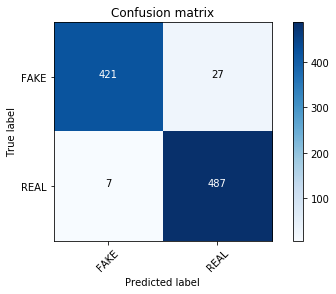

Confusion matrix, with little normalization


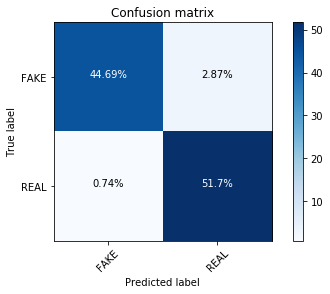

In [17]:
scores = model.evaluate(tfidf_test.toarray(), y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

pred_test = model.predict(tfidf_test.toarray())
pred = np.zeros(len(y_test))
for i in range(len(y_test)):
    if(pred_test[i][0] < .5):
        pred[i] = 0
    else:
        pred[i] = 1
print(y_test.shape , pred.shape)
score = sklearn.metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = sklearn.metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'] , mode='percent')

In [20]:
model = get_simple_model(count_train.shape[1])
model.fit(count_train.toarray(),y_train,batch_size=32,epochs=10,verbose=1,validation_data=(count_test.toarray() , y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               3120640   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 3,252,225
Trainable params: 3,252,225
Non-trainable params: 0
_________________________________________________________________
compile done
Train on 1911 samples, validate on 942 samples
Epoch 1/10
1911/1911 [==============================] - 4s 2ms/step - lo